In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math
import pydot

# preparing data
from sklearn.datasets import load_iris
from sklearn import datasets
# from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz

#models for Classification
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Loading the dataset

iris = datasets.load_iris()
ir = pd.DataFrame(iris.data)
ir.columns = iris.feature_names
ir['Species'] = iris.target

In [3]:
#first few instances of dataset

ir.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# order of pandas dataframe: Around 150 instances , 4 (independent variables) and 1 ( target variable)

ir.shape

(150, 5)

In [5]:
#Types of data in the dataframe

ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# Distribution of data

ir.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
# Checking for missing values in data instances

ir.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [8]:
# Evaluating the count of each species

ir['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

# Question 1:

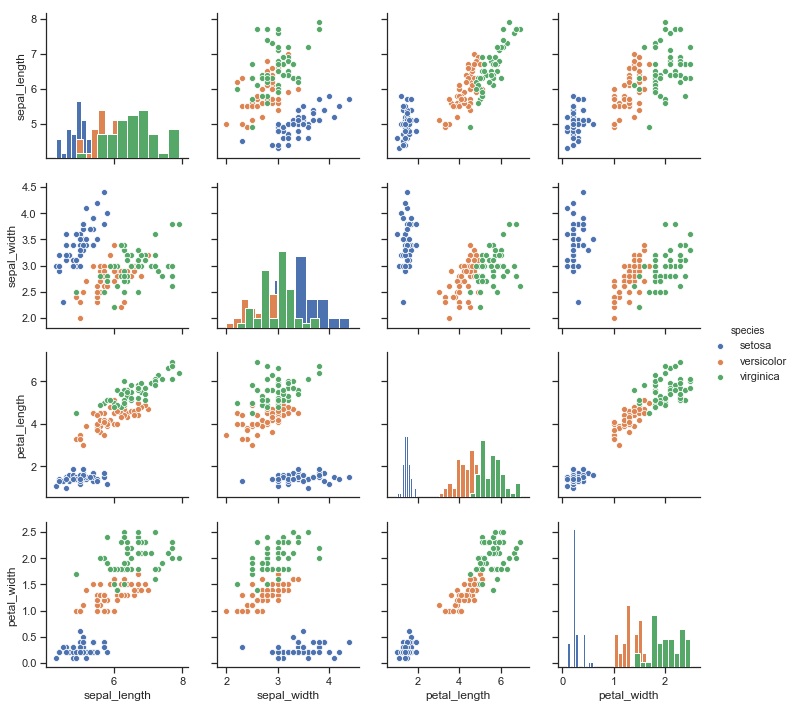

In [9]:
# EDA

# Ploting the pair plot
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris,hue="species",diag_kind='hist', height=2.5)

# Observations from Question 1:

Observing the above scatter plot matrix, the plots above the diagonal and below the diagonal are the mirror images of each other (ie. Plotted for the same features). Hence, focusing on the plots above the diagonal.

Observing the Plot between sepal_length and sepal_width it is clear that the setosa flowers can be separated from the non setosa flowers just by drawing a line between the setosa and non setosa flowers.

Looking at the sepal_length and petal_length or sepal_length and petal_width ,they are much more clear and from both these plots we can interpret that **setosa and non setosa flowers can be linearly separable**. Where as ,the Versicolour and virginica overlap. From the above observation it is clear that **petal_length and petal_width are the most important features to identify the separability of the three classes**.

**Focusing on the plot between petal_length and petal width using if-else condition we can build a model to classify the three flower types**. If petal length is less than or equal to 2 and petal width is less than or equal to 1 the flower type is setosa .if petal_width is less than 2 and petal_width is greater than or equal to 1 and petal_length is less than 5 and petal length is greater than 2.5 then the flower is classified as versicolor otherwise it is virginica

The Diagonal i,e Histograms show the univariate distribution of the data for the variable in that column, it determines the average of the sepal lengths , sepal widths and petal lengths,petal widths.Here most of the virginicas have the longer sepal lenghts, setosas have extremely short petal lenghts.

# Question 2: KNN

In [10]:
# split the data set for KNN classifier with 60% train , 20% validation and 20%test 

X = ir.iloc[:,0:4]
y = ir.iloc[:,4]

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [11]:
# Evaluating the shape of the train test and val data sets

print(X_train_val.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train_val.shape)
print(y_val.shape)
print(y_test.shape)

(90, 4)
(30, 4)
(30, 4)
(90,)
(30,)
(30,)


In [12]:
# Defining the KNN Classifier with default parameters

classifier = KNeighborsClassifier()

#Fitting the model
classifier.fit(X_train_val, y_train_val)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
#Predict test data results
prediction = classifier.predict(X_test)
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [14]:
# Printing accuracy for test data
print(metrics.accuracy_score(y_test, prediction))

0.9666666666666667


### The accuracy of KNN with default parameters with train and test is around 96.6%

#### Finding the best parameters of the classifuers, in this case, k for KNN *Using Validation set*

In [15]:
# Finding best K value for KNN

k = [1,5,10,15,20,25,30,35]
score= []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_val,y_train_val)
    k_pred= knn.predict(X_val)
    score.append(metrics.accuracy_score(y_val,k_pred))
print(score)

[0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333]


Text(0, 0.5, 'Validation Accuracy')

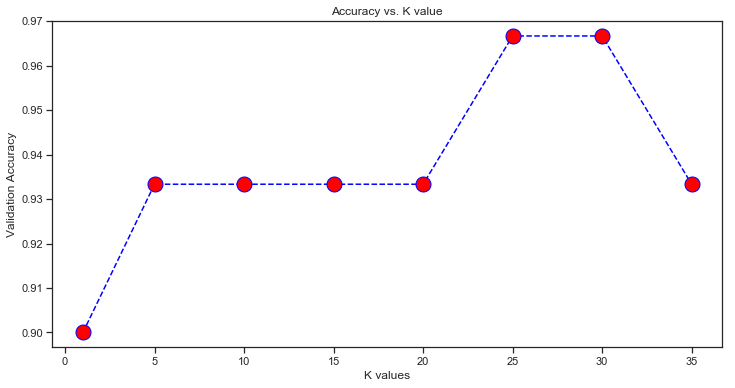

In [16]:
# plot the relationship between validation accuracy and K parameters
plt.figure(figsize=(12,6))
plt.plot(k,score,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. K value')
plt.xlabel('K values')
plt.ylabel('Validation Accuracy')

##### Choosing k = 25 as the value and to find accuracy score on test set

**Reason for Choosing K=25:** Higher K averages more voters in each prediction and hence is more resilient towards the outliers. Higher K will also have smoother decision boundaries which results in lower variance but increased bias.Considering this is a smaller data set the accuracies very slight variation.But keeping in general point of view and the accuracy I have chosen k=25 as my hypertuned parameter.

In [17]:
# Building our final KNN model with k=25

knn_classifier = KNeighborsClassifier(n_neighbors=25)

#Fitting the model
knn_classifier.fit(X_train_val, y_train_val)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [18]:
#Predict test data results with k=25
knn_pred_final = knn_classifier.predict(X_test)
knn_pred_final

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [19]:
#Printing accuracy for test data with k=25
print(metrics.accuracy_score(y_test, knn_pred_final))

1.0


### Reported Accuracy Using K = 25 on test set is 100%

# Question 3: SVM

In [20]:
# splitting the data set for SVM classifier with 80% train_validation and 20% test
X1 = ir.iloc[:,0:4]
y1 = ir.iloc[:,4]
X_trainval, X_test1, y_trainval, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [21]:
# Evaluating the shape of the trainvalidation and test after splitting

print(X_trainval.shape)
print(X_test1.shape)

print(y_trainval.shape)
print(y_test1.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [22]:
# Finding best C value for SVM

c = [0.1,0.5,1,2,5,10,20,50]
c_score= []
for i in c:
    sv = svm.SVC(kernel='linear', C=i, random_state=42)
    sv.fit(X_trainval,y_trainval)
    sv_predict = sv.predict(X_trainval)
    c_score.append(cross_val_score(sv, X_trainval, y_trainval, cv=10).mean()*100)
print(c_score)

[95.83333333333334, 95.83333333333333, 95.83333333333333, 95.83333333333334, 95.83333333333334, 95.0, 93.33333333333333, 93.33333333333333]


Text(0, 0.5, 'Validation Accuracy')

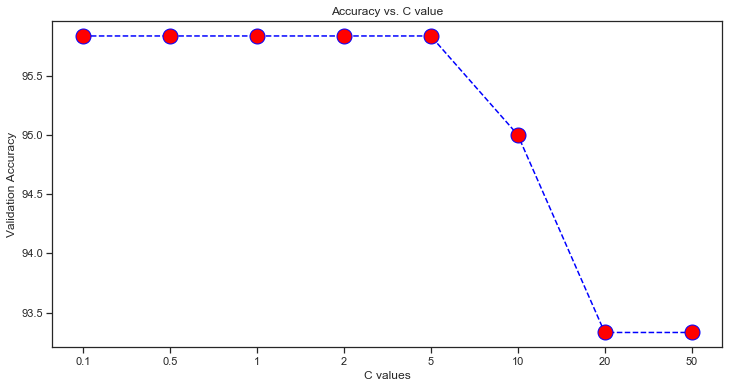

In [23]:
plt.figure(figsize=(12,6))

c1 = ['0.1','0.5','1','2','5','10','20','50']
plt.plot(c1,c_score,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. C value')
plt.xlabel('C values')
plt.ylabel('Validation Accuracy')

#### Choosing c = 0.5 as the value and to find mean accuracy score on test set

**Reason for choosing c=0.5:** When tested with c = 0.1 on test data set the accuracy is 93.33% and when tested with c = 0.5 to c = 5 the accuracy was same i.e 96.66%. Choosen C = 0.5 because if the c is lower the hyper plane margin will be higher and even though it misclassifies few data points we get good accuracy in the testing data set. Considering this is a smaller data sets the accuracies have very slight variation. so since c=0.5 has the maximum mean accuracy score I have chosen it as my hypertuned parameter.

In [24]:
# Building our final model with c =0.5

svm_clf_final = svm.SVC(kernel='linear', C=0.5,random_state=42)

#Fitting the model
svm_clf_final.fit(X_trainval, y_trainval)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [25]:
#Predict test data results with c=0.5
svm_predict_final = svm_clf_final.predict(X_test1)
svm_predict_final

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [26]:
# Repoting the mean accuracy using cross validation score 

print(metrics.accuracy_score(y_test1, svm_predict_final))

1.0


## The test accuracy score for the SVM classifier using c = 0.5 is 100%

# Question 4: Tree-based Classifiers

## For Decision Tree:

In [27]:
# Finding the best maximum depth value

d = [3, 5, 10,None]
d_score= []
for i in d:
    tree = DecisionTreeClassifier(max_depth = i,random_state=42) # Defining the classifier
    tree.fit(X_trainval,y_trainval) # Fitting the model
    tree_predict = tree.predict(X_trainval)
    d_score.append(cross_val_score(tree, X_trainval, y_trainval, cv=10).mean())
print(d_score)

[0.9333333333333332, 0.9166666666666666, 0.9249999999999998, 0.9249999999999998]


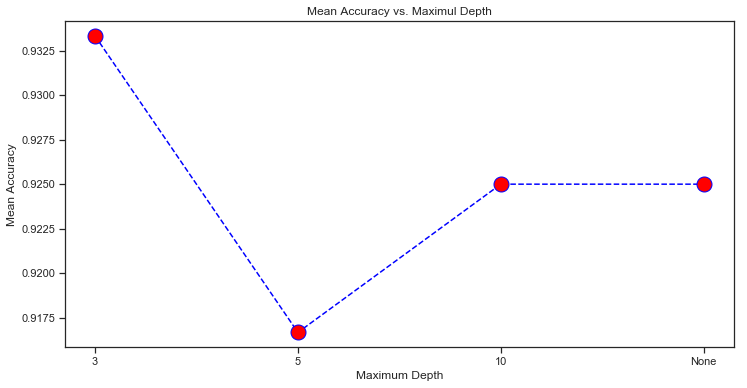

In [28]:
# Plotting the mean accuracy versus the maximum depth
d1 = ['3', '5', '10','None']
plt.figure(figsize=(12,6))
plt.plot(d1,d_score,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=15)
plt.title('Mean Accuracy vs. Maximul Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Mean Accuracy')
plt.show()

## Comparing the above mean accuracy scores choosing the max_depth = 3 and predicting using the test set

**Reason for choosing max_depth = 3:** 

1.When tested with the training data set only max_depth resulted in the highest accuracy of around 93.33% and the rest were lower than this.
2.The computation time taken for max_depth>3 is very much highr compared to lower max_depth

Considering the above two reasons I have chosen the max_depth = 3 value for the decision tree model.

In [29]:
# Building the final decision tree model with max_depth = 3 and printing the mean accuracy score

final_tree = DecisionTreeClassifier(max_depth = 3,random_state=42)
final_tree.fit(X_trainval,y_trainval)
final_tree_predict = final_tree.predict(X_test1)

print(metrics.accuracy_score(y_test1, final_tree_predict))

1.0


### The test mean accuracy score for the Decision Tree classifier using max_depth = 3 is 100%

## For Random Forest

In [30]:
# Finding the best maximum depth value and number of estimators for Random Forest Classifier

estimators = [5, 10, 50, 150, 200]
depth = [3, 5, 10, None]
m = []
rfed_score = []

for i in estimators:
    for j in depth:
        rf_clf = RandomForestClassifier(n_estimators = i, max_depth = j, random_state=42) # defining classifier
        rf_clf.fit(X_trainval,y_trainval) # Fitting the model
        rfed_score.append(cross_val_score(rf_clf, X_trainval, y_trainval, cv=10).mean())

print(rfed_score)


[0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9416666666666667, 0.9249999999999998, 0.9166666666666666, 0.9166666666666666, 0.9499999999999998, 0.9333333333333332, 0.9333333333333332, 0.9333333333333332, 0.9416666666666667, 0.9249999999999998, 0.9249999999999998, 0.9249999999999998, 0.9416666666666667, 0.9333333333333332, 0.9333333333333332, 0.9333333333333332]


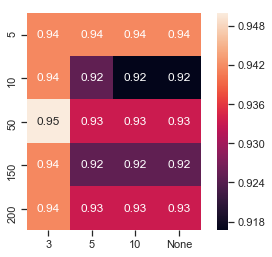

In [31]:
# Plotting heat map for mean accuracies for different values of number of trees and maximum depth

x_axis_lables = ['3', '5', '10', 'None']
y_axis_lables = [5, 10, 50, 150, 200]

rfed_score = np.reshape(rfed_score,(5,4))
sns.heatmap(rfed_score, annot=True, square=True, xticklabels=x_axis_lables, yticklabels=y_axis_lables);

## Choosing the hyper tuned parameters max_depth = 3 and n_estomators = 50 and building the final Random Forest Model

**Reason:** The time taken by building 200 trees is maximum and time taken by building the 50 trees is minimum considering the accuracy is almost the same in the cases where e = 50, 100, 200.From the above heat map the accuracy for number of estimators = 50 and max_depth = 3 is the highest. So , from the point of the computation time and accuracy I have chosen the n_estimators = 50 and max_depth=3

In [32]:
# Defining the random forest classifier
rf_final = RandomForestClassifier(max_depth= 3,n_estimators=50,random_state=42)

# Fitting the model
rf_final.fit(X_trainval,y_trainval)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
# predicting the model on the test data set
final_rfc_predict= rf_final.predict(X_test1)

In [34]:
# Evaluating the mean accuracy score using the cross validation score

print(metrics.accuracy_score(y_test1, final_rfc_predict))


1.0


### The test  accuracy score for the Random Forest classifier is 100%

## For Gradient Tree Boosting

In [35]:
# Defining the gradient boosting classifier
gbc = GradientBoostingClassifier(random_state=42)

In [36]:
# Fitting the model

gbc.fit(X_trainval,y_trainval)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [37]:
# Evaluating the best number of estimators

g = [5,10,50,150,200]
g_score= []
for k in g:
    gbc = GradientBoostingClassifier(n_estimators=k,random_state=42)
    gbc.fit(X_trainval,y_trainval)
    g_score.append(cross_val_score(gbc, X_trainval, y_trainval, cv=10).mean())
print(g_score)

[0.9333333333333332, 0.9333333333333332, 0.9249999999999998, 0.9249999999999998, 0.9249999999999998]


Text(0, 0.5, 'Mean Accuracy')

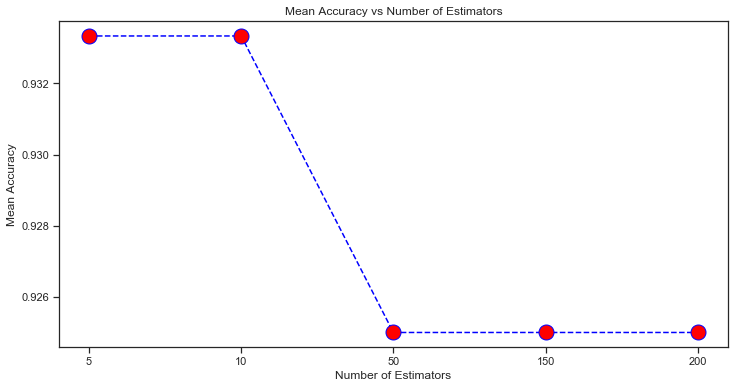

In [38]:
# Ploting the Mean Accuracy vs Number of Estimators
plt.figure(figsize=(12,6))
g1 = ['5','10','50','150','200']
plt.plot(g1,g_score,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=15)
plt.title('Mean Accuracy vs Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Accuracy')

In [39]:
# Defining the gradient boosting classifier
gbc_final = GradientBoostingClassifier(n_estimators=5, random_state=42)

# Fitting the model
gbc_final.fit(X_trainval,y_trainval)

# Predicting on the test data
gbc_final_predict = gbc_final.predict(X_test1)

# Printing the accuracy score
print(metrics.accuracy_score(y_test1, gbc_final_predict))

1.0


## The test accuracy score for the Gradient tree boosting classifier is 100%

Choosed number of estimators as 5 because although the accuracy results are same for both 5 and 10. Gradient boosting combines results along the way and as the number of estimators increases the computation time increases.And here the accuracy rate is same for both the cases so I have choosen the number of estimators as 5 since reqires less computation time to process.

# Question 5: Analysis

**1. Explain why you had to split the dataset into train and test sets?**

**Answer:** The reason we split the given data set into the train and test sets is that if we dont do that out model will learn the entire data and will give maximum accuracy and when we test it on some unknown data we get very less accuracy. Hence it is always a better practice to split the data into tain and test so that while testing you ensure that the model is actually finding real patterns in the data and not just memorizing it.

**2. Explain why when finding the best parameters for KNN you didn't evaluate directly on the test set and had to use a validation test.**

**Answer:** While assessing best parameters for KNN, for example, finding the ideal k that must be manually set for KNN, there is a risk of overfitting on the test set because of the fact that the parameters can be changed until the estimator performs ideally. Hence ,knowledge about the test set can leak into the model which results in the evaluation metrics  not reporting on the  generalization performance.To tackle this issue, one more set of the dataset can be held out as validation set: training is held on the training set, after which evaluation is done on the validation set, and when the analysis is by all accounts fruitful, final evaluation is done on the test set.


**3. What was the effect of changing k for KNN. Was the accuracy always affected the same way with an increase of k? Why do you think this happened?**

**Answer:** The effect of changing the k for KNN was, when we train the model using the default k parameter the model performed with some accuracy and when we used the hypertuned K value in the testing set then the model performed with the maximum accuracy.

The accuracy was not always affected the same way as we increase the k it increased to a certain value and then started droppping with the increase of k. 

The reason is When you increase the k the decision surface gets smoother and and our model will be able to generaliste the data but if we further increase the k value after certain pont we can see that our model becomes under fitted as most of the data comes under the same class and model will not be able to generalise the data. If the k value is too large the smoothing effect we intuited results in decreased variance which will effect overall performance negatively.

**4. What was the relative effect of changing the max depths for decision tree and random forests? Explain the reason for this.**

**Answer:** The relative effect of changing the max depths for the decision tree and random forests is that after a certain max depth value , as the depth of the decision tree is increased the accuracy is decreased.

The reason behind this is if the max depth is too high then the model would overfit and while evaluating out model will not be able to generalise the data and the resulting a negative performance.

**5. Comment on the effect of the number of estimators for Gradient Tree Boosting and what was the relative effect performance of gradient boosting compared with random forest. Explain the reason for this.**

**Answer:** For the Gradient Tree Boosting the when the number of estimators are 5 and 10 the mean accuracy is 93.33 % and when the number of estimators were increased to 10, 150 and 200 the accuracy dropped to 92.49% and remained constant.

For the randomforest classifier when the number of estimators are 5 and 10 the resulting mean accuracy was 94% and when the number of estimators increased to 50 the the mean accuracy resulted was 95% with further increase of number of estimators to 150 and 200 the accuracy dropped to 94%. Focusing on both of them for random forest as the number of estimators increase the accuracy increases and conversely for the gradient boosting algorithm as the number of estimators increases the accuracy is getting decreased.Comparing both gradient tree boosting and random forest classifiers with respect to the number of estimators random forest classifier resulted in better accuracy compared to the gradient tree boosting.

The reason is for the random forest large number of trees, combined using averages at the end of the process.Where as for the gradient boosting start the combining process at the beginning, instead of at the end.Random forests combine results at the end of the process while gradient boosting combines results along the way.So there might be duplication of results in gradient tree boosting since we have small data set which resulted in the decrease of accuracy as the number of estimators increased and whre as since the results are combined in the end with the averages for the random forest the accuracy increased as the number of estimators increased.

In general for the random forest we need to tune only few parameters such as max_depth,number of estimators and learning rate where as in the gradient boosting when al the parameters are hypertuned then only most of the times it results in better accuracy. In out model we just hypertuned the number of estimators , it might me the reason that other paramters were left default so the model resulted in low accuracy compared to random forest.


**6. What does the parameter C define in the SVM classifier? What effect did you observe and why do you think this happened?**

**Answer:** The C parameter tells us about how misclassifying the training examples can be avoided.For large C values smaller margin hyper plane is choosen which results in evaluating all the data points in the training set accurately.Conversely , with a lower C values larger margin hyper plane is chooisen , in this case few ponts will be misclassified in the training data set.Larger values of c might result in overfitting

When evaluated on the training data c=0.5 to c=5 the accuracy was same i.e 95.8 and post that as the c value increased the accuracy got decreased. The reason is since the data set is very small as we increase the c value the margin gets so small that the classifier might have missclassified the data which resulted in the lower accuracy.

I have tested the accuracy resutls of all the c values which were constant in the test set and received the same accuracy. So I have choosed the lowest C value of them which is c= 0.5, since that has large margin hyper plane which may best accuracy when evaluated on the test data ,in case the test data is large.

            

## References Used:

https://scikit-learn.org/stable/modules/cross_validation.html
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
https://scikit-learn.org/stable/modules/model_evaluation.html
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier
https://www.datasciencecentral.com/profiles/blogs/decision-tree-vs-random-forest-vs-boosted-trees-explained